In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random

def draw_1_line ( l1, color1 ):
    l0 = np.arange(1, np.size(l1)+1, 1)
    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1 )
    ax.legend()
    plt.show()

def draw_2_lines (l1, color1, label1, l2, color2, label2):
    l0 = np.arange(1, np.size(l1)+1, 1)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1 )
    ax.plot(l0, l2, c=color2 )
    ax.set_ylabel ("nb of patterns used to compute weights")
    ax.set_xlabel ("nb of stable patterns")
    ax.set_title('"nb of patterns used to compute weights VS nb of stable patterns')
    xmin=1
    xmax=60
    ax.set_xlim([xmin,xmax])
    ymin= -2
    ymax= 20
    ax.set_ylim([ymin,ymax])

    plt.show()   
    
def energy(pattern, weight):
    energy = np.zeros ((1,len (pattern)))
    for i in range (0, len (pattern)): 
        m = np.dot(pattern[i], weight)
        energy[0][i] = -1 * np.dot(m, pattern[i].transpose())
        
    return energy[0][0]

def sign_fxn(x):
    return np.where(x < 0, -1, 1)



def distort_pattern (pic_data, nb_distorted_bits ):
    indicies = np.arange(len(pic_data[0]))
    np.random.shuffle(indicies)
    pic_data_distorted = np.copy(pic_data)
    for pattern_idx in range (0,len(pic_data_distorted) ):
        for i in range(nb_distorted_bits):
            pic_data_distorted[pattern_idx][indicies[i]] = -1 * pic_data[pattern_idx][indicies[i]]
        
    return pic_data_distorted

def show_img (text ,pic_data_distorted):
    print (text)
    for i in range (0, len (pic_data_distorted) ):
        actual_from_distorted = np.reshape(pic_data_distorted[i], (32, 32))
        plt.imshow(actual_from_distorted, interpolation='nearest')
        plt.show()    
    return 

def generate_two_patterns ():
    pic_data = np.loadtxt('data/pict.dat', delimiter = ',', dtype = 'i')
    rows_pic_data = int(pic_data.shape[0]/1024)
    pic_data = np.reshape(pic_data, (rows_pic_data,1024))

    memorized_pattern_stack = np.vstack([pic_data[4],pic_data[5],pic_data[6]]) 
    
    nb_distorted_bits = 100
    distorted_pattern = distort_pattern (pic_data,nb_distorted_bits)
    distorted_pattern_stack = np.vstack([distorted_pattern[4], distorted_pattern[5], distorted_pattern[6] ])
    show_img ("distorted" ,distorted_pattern_stack)
    return memorized_pattern_stack, distorted_pattern_stack




def store_patterns(input_pattern):
        weight_matrix = np.dot(input_pattern.transpose(), input_pattern)
        output_pattern = sign_fxn(np.dot(input_pattern, weight_matrix))
#         print ("nb non zeros",np.count_nonzero (input_pattern - output_pattern) )
        #print("has the weight memorized the patterns?",np.array_equal(input_pattern, output_pattern)) #to check if the network was able to store the patterns
        return weight_matrix

def check_convergence_batch(input_pattern, weight_matrix, distorted_pattern, max_iterations, showImgOrNot):
    iterations = 0
    while not np.array_equal(input_pattern, distorted_pattern) and iterations < max_iterations:
        distorted_pattern = sign_fxn(np.dot(distorted_pattern, weight_matrix))
        iterations += 1
    stable_or_not = np.array_equal(input_pattern, distorted_pattern)
    #print("is it stable? ",stable_or_not)
#     print("iterations",iterations) # after how many iterations
    if showImgOrNot == "show img":
        show_img ("img after updating" ,distorted_pattern) 
    return stable_or_not 

max_iterations = 10
memorized_pattern_stack, distorted_pattern_stack = generate_two_patterns ()
weight_matrix = store_patterns(memorized_pattern_stack)

check_convergence_batch(memorized_pattern_stack, weight_matrix, distorted_pattern_stack, max_iterations, "show img") 



distorted


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

img after updating


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

False

In [4]:


def create_random_patterns (nb_patterns, nb_neurons, biased_mean):
    random_patterns= np.zeros ((nb_patterns, nb_neurons))
    for i in range (nb_patterns):
        for j in range (nb_neurons):
            a_value= random.gauss(biased_mean, 1)  # std variance =1
            random_patterns[i][j] = sign_fxn ( a_value )
    return random_patterns

# test: how many random patterns can we store? 
def test (max_nb_patterns):
    nb_neurons=1024
    for i in range (0, max_nb_patterns):
        print ("nb_patterns:", i)
        nb_patterns=i
        random_patterns = create_random_patterns (nb_patterns, nb_neurons, biased_mean)
        weight_matrix = store_patterns(random_patterns)
    return 

# 3.5.2 
max_nb_patterns= 100
test (max_nb_patterns)


# from 3.5.4 to 3.5.7
def draw_1_scatter (l0, l1, color):
    plt.scatter (l0, l1, c=color)
    plt.show()
    
def test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise):
    nb_neurons = 100
    flip_percentage = 0.05
    nb_flip_bits = int (nb_neurons * flip_percentage)
    total_stable_list = []
    for i in range (1, max_nb_patterns+1):
        nb_patterns=i
        random_patterns = create_random_patterns (nb_patterns, nb_neurons, biased_mean)
        #print(random_patterns)
        weight_matrix = store_patterns(random_patterns)
        if remove_self_connection == "remove self connection": 
            np.fill_diagonal(weight_matrix, 0)
        
        if (noise == "flip") :
            distorted_pattern_stack = distort_pattern (random_patterns, nb_flip_bits)
        elif (noise == "no flip") : 
            distorted_pattern_stack = np.copy(random_patterns) 
            
        sum_stable = 0
        for j in range (len(distorted_pattern_stack)):
            max_iterations = 5
            stable_or_not = check_convergence_batch(random_patterns[j], weight_matrix, distorted_pattern_stack[j], max_iterations, "dont show img")
            one = np.where(stable_or_not == True, 1, 0)
            sum_stable += one
        total_stable_list.append (sum_stable) 
    print ("total_stable_list",total_stable_list)
    return total_stable_list


    
max_nb_patterns= 300
remove_self_connection = "keep self connection"
#noise = "no flip"
biased_mean=0
total_nb_stable_patterns_list_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'no flip')

#noise = "flip"
total_nb_stable_patterns_list_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'flip')
# 

nb_patterns: 0
nb_patterns: 1
nb_patterns: 2
nb_patterns: 3
nb_patterns: 4
nb_patterns: 5
nb_patterns: 6
nb_patterns: 7
nb_patterns: 8
nb_patterns: 9
nb_patterns: 10
nb_patterns: 11
nb_patterns: 12
nb_patterns: 13
nb_patterns: 14
nb_patterns: 15
nb_patterns: 16
nb_patterns: 17
nb_patterns: 18
nb_patterns: 19
nb_patterns: 20
nb_patterns: 21
nb_patterns: 22
nb_patterns: 23
nb_patterns: 24
nb_patterns: 25
nb_patterns: 26
nb_patterns: 27
nb_patterns: 28
nb_patterns: 29
nb_patterns: 30
nb_patterns: 31
nb_patterns: 32
nb_patterns: 33
nb_patterns: 34
nb_patterns: 35
nb_patterns: 36
nb_patterns: 37
nb_patterns: 38
nb_patterns: 39
nb_patterns: 40
nb_patterns: 41
nb_patterns: 42
nb_patterns: 43
nb_patterns: 44
nb_patterns: 45
nb_patterns: 46
nb_patterns: 47
nb_patterns: 48
nb_patterns: 49
nb_patterns: 50
nb_patterns: 51
nb_patterns: 52
nb_patterns: 53
nb_patterns: 54
nb_patterns: 55
nb_patterns: 56
nb_patterns: 57
nb_patterns: 58
nb_patterns: 59
nb_patterns: 60
nb_patterns: 61
nb_patterns: 62
nb

In [34]:
print(np.shape(distorted_pattern_stack))

(3, 1024)


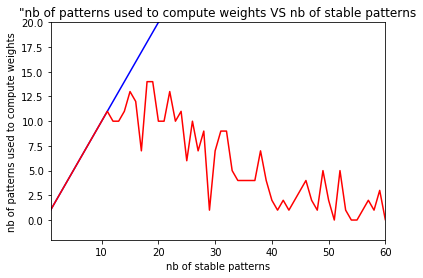

In [41]:
draw_2_lines (total_nb_stable_patterns_list_NoFlip, 'b', 'keepSelfConn_NoFlip',
              total_nb_stable_patterns_list_Flip,   'r', 'keepSelfConn_Flip')

In [23]:
remove_self_connection = "remove self connection" 
total_nb_stable_patterns_list_removeSelfConn_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'no flip')
total_nb_stable_patterns_list_removeSelfConn_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'flip')

total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

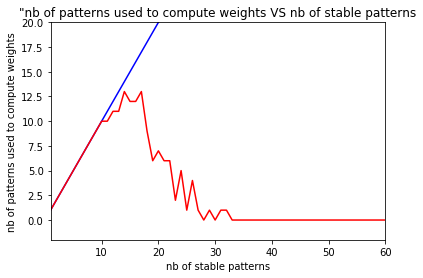

In [40]:
draw_2_lines (total_nb_stable_patterns_list_removeSelfConn_NoFlip, 'b', 'removeSelfConn_NoFlip',
              total_nb_stable_patterns_list_removeSelfConn_Flip,'r', 'removeSelfConn_Flip')

In [25]:
 
biased_mean = 0.5
total_nb_stable_patterns_list_biased_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'no flip')

total_nb_stable_patterns_list_biased_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise = 'flip')


total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

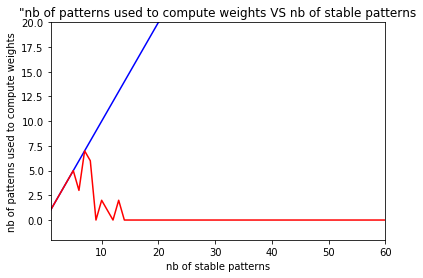

In [39]:
draw_2_lines (total_nb_stable_patterns_list_biased_NoFlip, 'b', 'bias 0.5 keepSelfConn_NoFlip',
              total_nb_stable_patterns_list_biased_Flip,   'r', 'bias 0.5 keepSelfConn_Flip')

## Sparse Patterns

In [216]:
def sign_fxn_sparse(x):
    return np.where(x < 0, 0, 1)

def create_random_patterns_sparse(nb_patterns, nb_neurons, biased_mean):
    random_patterns= np.zeros ((nb_patterns, nb_neurons))
    for i in range (nb_patterns):
        for j in range (nb_neurons):
            a_value= random.gauss(biased_mean, 1)  # std variance =1
            random_patterns[i][j] = sign_fxn_sparse(a_value)
    return random_patterns

def store_sparse_patterns(input_pattern, rho):
    weight_matrix = np.dot((input_pattern - rho).transpose(), (input_pattern - rho))
    #output_pattern = sign_fxn_sparse(np.dot(input_pattern, weight_matrix))  
    return weight_matrix

def check_convergence_sparse(input_pattern, weight_matrix, distorted_pattern, max_iterations, theta):
    iterations = 0
    while not np.array_equal(input_pattern, distorted_pattern) and iterations < max_iterations:
        distorted_pattern = 0.5 + 0.5 * (sign_fxn_sparse(np.dot(distorted_pattern, weight_matrix) - theta))
        iterations += 1
        
    stable_or_not = np.array_equal(input_pattern, distorted_pattern)
    #print(stable_or_not)
    
    return stable_or_not

def test_1_to_300_patterns_for_sparse(rho, max_nb_patterns, biased_mean, remove_self_connection, noise):
    nb_neurons = 100
    flip_percentage = 0.05
    nb_flip_bits = int (nb_neurons * flip_percentage)
    total_stable_list = []
    for i in range (1, max_nb_patterns+1):
        nb_patterns=i
        random_patterns = create_random_patterns_sparse(nb_patterns, nb_neurons, biased_mean)
        weight_matrix = store_sparse_patterns(random_patterns, rho)
        if remove_self_connection == "remove self connection": 
            np.fill_diagonal(weight_matrix, 0)

        if (noise == "flip") :
            distorted_pattern_stack = distort_pattern (random_patterns, nb_flip_bits)
        elif (noise == "no flip") : 
            distorted_pattern_stack = np.copy(random_patterns) 
            
        sum_stable = 0
        for j in range (len(distorted_pattern_stack)):
            max_iterations = 5
            stable_or_not = check_convergence_sparse(random_patterns[j], weight_matrix, distorted_pattern_stack[j], max_iterations, biased_mean)
            one = np.where(stable_or_not == True, 1, 0)
            sum_stable += one
        total_stable_list.append (sum_stable) 
    
    print ("total_stable_list",total_stable_list)
    return total_stable_list

In [217]:
def get_max_storage(rho):
    max_nb_patterns= 15
    remove_self_connection = "remove self connection"
    max_list = []
    for i in np.arange(0,5.5,0.5):
        bias = i
        print(bias)
        total_nb_stable_patterns_list_biased_Flip = test_1_to_300_patterns_for_sparse(rho, max_nb_patterns, 
                                                bias, remove_self_connection, noise = 'flip')
        #max_list.append(max(total_nb_stable_patterns_list_biased_Flip))
        max_list.append(total_nb_stable_patterns_list_biased_Flip[-1])

    return max_list

0.0
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]
0.5
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1.0
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.5
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
2.0
total_stable_list [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 3, 2, 2]
2.5
total_stable_list [0, 1, 2, 3, 4, 6, 4, 7, 3, 6, 6, 9, 7, 8, 7]
3.0
total_stable_list [1, 2, 1, 4, 3, 6, 6, 7, 9, 10, 11, 8, 12, 14, 14]
3.5
total_stable_list [1, 2, 3, 4, 5, 6, 6, 8, 9, 9, 11, 12, 13, 14, 15]
4.0
total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
4.5
total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
5.0
total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 1, 0, 0, 2, 7, 14, 15, 15, 15, 15]
0.0
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
0.5
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.0
total_stable_list [0, 0, 0, 0, 0, 0, 0, 0, 0,

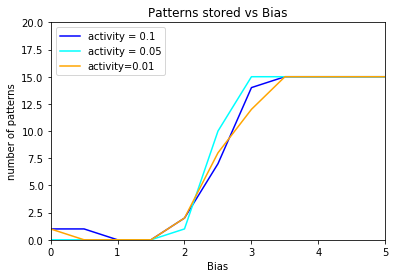

In [220]:
list_1 = get_max_storage(0.1)
print(list_1)
list_2 = get_max_storage(0.05)
print(list_2)
list_3 = get_max_storage(0.01)
print(list_3)

def draw_3_lines (title, l1, color1, label1, 
                  l2, color2, label2, 
                  l3, color3, label3,
                  xmin= 0 ,xmax= 5,
                  ymin= 0, ymax= 20):
    l0 = np.arange(0, 5.5, 0.5)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label=label1 )
    ax.plot(l0, l2, c=color2, label=label2 )
    ax.plot(l0, l3, c=color3, label=label3 )
    ax.legend(loc = 'upper left')
    ax.set_ylabel ("number of patterns")
    ax.set_xlabel ("Bias")
    ax.set_title(title)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    #plt.savefig('D:/Sweden/p3/ANN/lab3/'+ title + '.png', dpi=300)
    plt.show() 
    
    
draw_3_lines ('Patterns stored vs Bias',
              list_1, 'blue', 'activity = 0.1',
              list_2, 'cyan', 'activity = 0.05',
              list_3, 'orange', 'activity=0.01',
              xmin= 0 ,xmax= 5, ymin=0, ymax=20)

In [141]:
print(type(total_nb_stable_patterns_list_biased_Flip))

for i in np.arange(0,5,0.5):
    print(i)

<class 'list'>
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
